In [5]:
import sys
sys.path.append("..")

import utils

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['grid.color'] = "#CCCCCC"
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.edgecolor'] = 'none'

import pandas as pd
import vector

In [7]:
samples = {
    "hh4b": ["GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
}

# selection applied
#path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct26NoSelection/"
# no selection applied
# path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct26NoApplySelection/"
# resolved trigger and nak4>=4
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct27TrigAndNAK44/"
dirs = {path_to_dir: samples}
year = "2018"

filters = None

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters=filters),
    }

samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].keys())
print(f"Keys in events_dict")
for i in keys_loaded: print(i)

Loading GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8
Keys in events_dict
('GenHiggsEta', 0)
('GenHiggsEta', 1)
('GenHiggsPhi', 0)
('GenHiggsPhi', 1)
('GenHiggsMass', 0)
('GenHiggsMass', 1)
('GenHiggsPt', 0)
('GenHiggsPt', 1)
('GenbEta', 0)
('GenbEta', 1)
('GenbEta', 2)
('GenbEta', 3)
('GenbPhi', 0)
('GenbPhi', 1)
('GenbPhi', 2)
('GenbPhi', 3)
('GenbMass', 0)
('GenbMass', 1)
('GenbMass', 2)
('GenbMass', 3)
('GenbPt', 0)
('GenbPt', 1)
('GenbPt', 2)
('GenbPt', 3)
('ak4JetHiggsMatch', 0)
('ak4JetHiggsMatch', 1)
('ak4JetHiggsMatch', 2)
('ak4JetHiggsMatch', 3)
('ak4JetHiggsMatch', 4)
('ak4JetHiggsMatch', 5)
('ak4JetHiggsMatchIndex', 0)
('ak4JetHiggsMatchIndex', 1)
('ak4JetHiggsMatchIndex', 2)
('ak4JetHiggsMatchIndex', 3)
('ak4JetHiggsMatchIndex', 4)
('ak4JetHiggsMatchIndex', 5)
('ak4JethadronFlavour', 0)
('ak4JethadronFlavour', 1)
('ak4JethadronFlavour', 2)
('ak4JethadronFlavour', 3)
('ak4JethadronFlavour', 4)
('ak4JethadronFlavour', 5)
('ak8FatJetHiggsMatch', 0)
('ak8FatJetHi

## Investigate confusion matrix

In [8]:
drbh1ak8 = events_dict["hh4b"]["ak8FatJetMaxdRH1"].to_numpy()
drbh2ak8 = events_dict["hh4b"]["ak8FatJetMaxdRH2"].to_numpy()
indexak8 = events_dict["hh4b"]["ak8FatJetHiggsMatchIndex"].to_numpy()
indexak4 = events_dict["hh4b"]["ak4JetHiggsMatchIndex"].to_numpy()
nbh1ak8 = events_dict["hh4b"]["ak8FatJetNumBMatchedH1"].to_numpy()
nbh2ak8 = events_dict["hh4b"]["ak8FatJetNumBMatchedH2"].to_numpy()

### With overlap

In [9]:
h1ak4 = indexak4 == 0
h2ak4 = indexak4 == 1
h1ak8 = indexak8 == 0
h2ak8 = indexak8 == 1

num_ak4m2h1 = h1ak4.sum(axis=1)
num_ak4m2h2 = h2ak4.sum(axis=1)

num_ak8m2h1 = h1ak8.sum(axis=1)
num_ak8m2h2 = h2ak8.sum(axis=1)


In [10]:
# is ak8 matched to H1
h1ak8

array([[False, False, False],
       [ True, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [ True, False, False]])

In [11]:
# is ak8 matched to H2
h2ak8

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True, False, False],
       [False, False, False],
       [False, False, False]])

In [12]:
num_ak8m2h = num_ak8m2h1 + num_ak8m2h2
num_ak8m2h

array([0, 1, 0, ..., 1, 0, 1])

In [13]:
num_ak4m2h = num_ak4m2h1 + num_ak4m2h2
num_ak4m2h

array([3, 3, 4, ..., 3, 3, 4])

In [14]:
nak8_axis = hist.axis.Variable([0,1,2,3], name="nak8", label="Number of AK8 matched to Higgs")
nak4_axis = hist.axis.Variable([0,1,2,3,4,5,6], name="nak4", label="Number of AK4 matched to Higgs")


In [15]:
nak4_axis

Variable([0, 1, 2, 3, 4, 5, 6], name='nak4', label='Number of AK4 matched to Higgs')

In [16]:
h = hist.Hist(nak4_axis)
h.fill(nak4=num_ak4m2h)
h

Hist(Variable([0, 1, 2, 3, 4, 5, 6], name='nak4', label='Number of AK4 matched to Higgs'), storage=Double()) # Sum: 999781.0 (1000000.0 with flow)

In [17]:
h = hist.Hist(nak8_axis)
h.fill(nak8=num_ak8m2h)

Hist(Variable([0, 1, 2, 3], name='nak8', label='Number of AK8 matched to Higgs'), storage=Double()) # Sum: 999496.0 (1000000.0 with flow)

In [18]:
h = hist.Hist(nak4_axis, nak8_axis)
h.fill(nak8=num_ak8m2h, nak4=num_ak4m2h)

Hist(
  Variable([0, 1, 2, 3, 4, 5, 6], name='nak4', label='Number of AK4 matched to Higgs'),
  Variable([0, 1, 2, 3], name='nak8', label='Number of AK8 matched to Higgs'),
  storage=Double()) # Sum: 999277.0 (1000000.0 with flow)

In [19]:
h[{"nak4":4}].to_numpy()

(array([302352.,  99113.,  70091.]), array([0., 1., 2., 3.]))

In [20]:
np.sum(num_ak8m2h[num_ak4m2h==4]==0)

302352

In [21]:
np.sum((num_ak8m2h==0) & (num_ak4m2h==4))

302352

Text(0.5, 1.0, 'Overlap between ak4 and ak8')

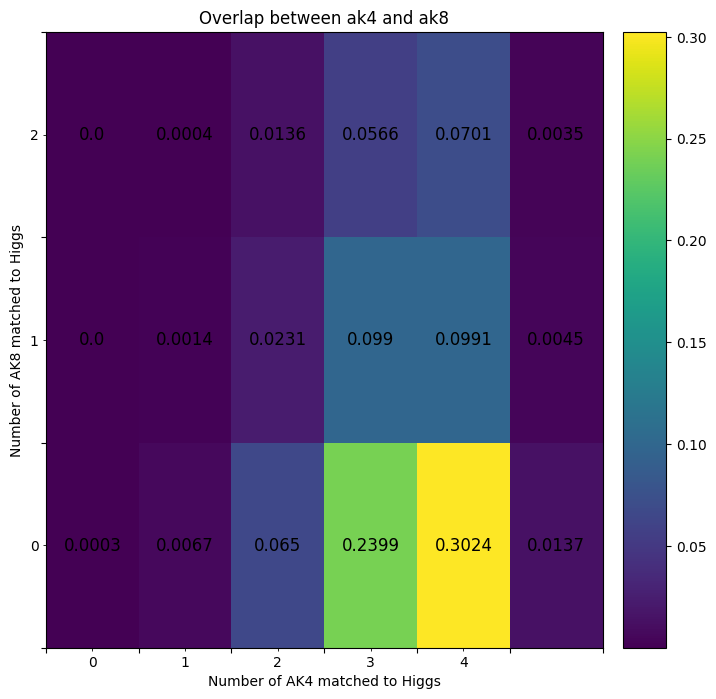

In [22]:

nevents = num_ak8m2h1.shape[0]
h = hist.Hist(nak4_axis, nak8_axis)
h.fill(nak8=num_ak8m2h, nak4=num_ak4m2h)

h = h/nevents

fig, ax = plt.subplots(figsize=(8, 8))
mplhep.hist2dplot(h, ax=ax, flow='none')
values, bins_x, bins_y = h.to_numpy()
for i in range(len(bins_x) - 1):
    for j in range(len(bins_y) - 1):
        ax.text(
            (bins_x[i] + bins_x[i + 1]) / 2,
            (bins_y[j] + bins_y[j + 1]) / 2,
            values[i, j].round(4),
            color="black",
            ha="center",
            va="center",
            fontsize=12,
        )
# Hide major tick labels
ax.set_xticklabels('')
ax.set_yticklabels('')

# Customize minor tick labels
ax.set_xticks([0.5,1.5,2.5,3.5,4.5],      minor=True)
ax.set_xticklabels(['0','1','2','3','4'], minor=True)
ax.set_yticks([0.5,1.5,2.5],      minor=True)
ax.set_yticklabels(['0','1','2'], minor=True)
ax.set_title("Overlap between ak4 and ak8")

#### Number of reconstructible Higgses

In [23]:
nak8_rec_axis = hist.axis.Variable([0,1,2,3], name="nak8", label="Number of reconstructible Higgs (AK8)")
nak4_rec_axis = hist.axis.Variable([0,1,2,3], name="nak4", label="Number of reconstructible Higgs (AK4)")


In [24]:
indexak4

array([[ 1.0000e+00,  0.0000e+00, -9.9999e+04,  0.0000e+00, -9.9999e+04,
        -9.9999e+04],
       [ 0.0000e+00,  1.0000e+00, -9.9999e+04,  1.0000e+00, -9.9999e+04,
        -9.9999e+04],
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00, -9.9999e+04,
        -9.9999e+04],
       ...,
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, -9.9999e+04, -9.9999e+04,
        -9.9999e+04],
       [ 0.0000e+00,  0.0000e+00,  1.0000e+00, -9.9999e+04, -9.9999e+04,
        -9.9999e+04],
       [ 0.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00, -9.9999e+04,
        -9.9999e+04]])

In [25]:
np.sum(indexak4 == 0, axis=1)

array([2, 1, 2, ..., 2, 2, 2])

In [26]:
# to have a reconstrucible higgs by ak4 we need 2 AK4 jets matched to each H
num_h1recak4 = (np.sum(indexak4 == 0, axis=1)==2).astype(int)
num_h2recak4 = (np.sum(indexak4 == 1, axis=1)==2).astype(int)
print(num_h1recak4)
print(num_h2recak4)
num_hrecak4 = num_h1recak4 + num_h2recak4

[1 0 1 ... 1 1 1]
[0 1 1 ... 0 0 1]


In [27]:
indexak8

array([[-99999, -99999, -99999],
       [     0, -99999, -99999],
       [-99999, -99999, -99999],
       ...,
       [     1, -99999, -99999],
       [-99999, -99999, -99999],
       [     0, -99999, -99999]])

In [28]:
# to have a reconstrucible higgs by ak8 we need 1 AK8 jets matched to each H
num_h1recak8 = (np.sum(indexak8 == 0, axis=1)==1).astype(int)
num_h2recak8 = (np.sum(indexak8 == 1, axis=1)==1).astype(int)
print(num_h1recak8)
print(num_h2recak8)
num_hrecak8 = num_h1recak8 + num_h2recak8

[0 1 0 ... 0 0 1]
[0 0 0 ... 1 0 0]


Text(0.5, 1.0, 'Overlap between ak4 and ak8')

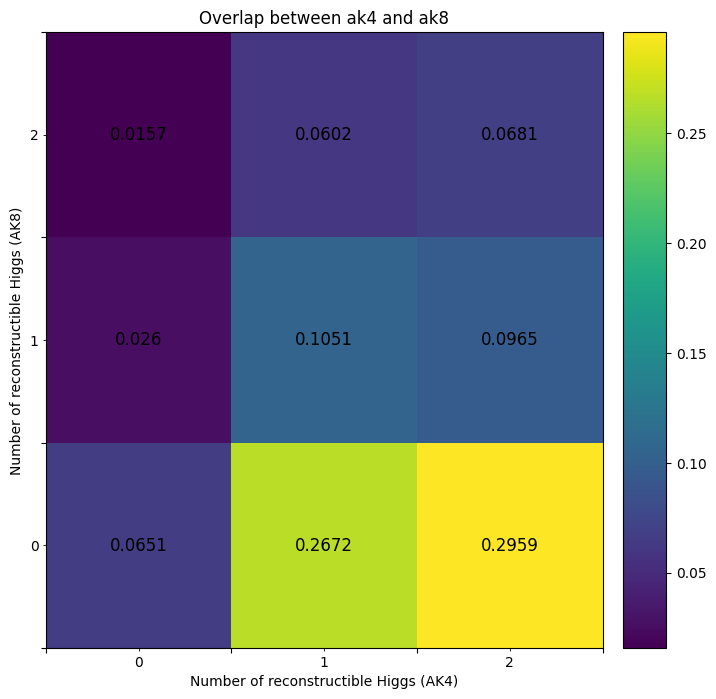

In [29]:
nevents = num_h1recak4.shape[0]
h = hist.Hist(nak4_rec_axis, nak8_rec_axis)
h.fill(nak8=num_hrecak8, nak4=num_hrecak4)

h = h/nevents

fig, ax = plt.subplots(figsize=(8, 8))
mplhep.hist2dplot(h, ax=ax, flow='none')
values, bins_x, bins_y = h.to_numpy()
for i in range(len(bins_x) - 1):
    for j in range(len(bins_y) - 1):
        ax.text(
            (bins_x[i] + bins_x[i + 1]) / 2,
            (bins_y[j] + bins_y[j + 1]) / 2,
            values[i, j].round(4),
            color="black",
            ha="center",
            va="center",
            fontsize=12,
        )
# Hide major tick labels
ax.set_xticklabels('')
ax.set_yticklabels('')

# Customize minor tick labels
ax.set_yticks([0.5,1.5,2.5],      minor=True)
ax.set_yticklabels(['0','1','2'], minor=True)
ax.set_xticks([0.5,1.5,2.5],      minor=True)
ax.set_xticklabels(['0','1','2'], minor=True)
ax.set_title("Overlap between ak4 and ak8")

### Remove overlap

In [30]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "PNetMass" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [31]:
# make boolean of whether ak4 is overlapping with ak8

jets = make_vector(events_dict["hh4b"], "ak4Jet")
fatjets = make_vector(events_dict["hh4b"], "ak8FatJet")

In [32]:
deltaR_fj0 = np.array([jets[:, i].deltaR(fatjets[:, 0]) for i in range(6)]).T
deltaR_fj1 = np.array([jets[:, i].deltaR(fatjets[:, 1]) for i in range(6)]).T

deltaR_fj = np.array([deltaR_fj0, deltaR_fj1])

In [33]:
indexak8h1 = np.sum(h1ak8, axis=1)
indexak8h1

array([0, 1, 0, ..., 0, 0, 1])

In [34]:
indexak8h2 = np.sum(h2ak8, axis=1)
indexak8h2

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
h1ak4

array([[False,  True, False,  True, False, False],
       [ True, False, False, False, False, False],
       [ True, False,  True, False, False, False],
       ...,
       [False,  True,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [ True, False, False,  True, False, False]])

In [36]:
overlap_fj_h1 = []
for i,index in enumerate(indexak8h1):
    if index>1: 
        overlap_fj_h1.append(np.array([False]*6))
        continue
    overlap_fj_h1.append(deltaR_fj[index][i] < 0.4)
overlap_fj_h1 = np.array(overlap_fj_h1)

In [37]:
overlap_fj_h2 = []
for i,index in enumerate(indexak8h2):
    if index>1: 
        overlap_fj_h2.append(np.array([False]*6))
        continue
    overlap_fj_h2.append(deltaR_fj[index][i] < 0.4)
overlap_fj_h2 = np.array(overlap_fj_h2)

In [38]:
overlap_fj_h1

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False,  True],
       ...,
       [ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [39]:
overlap_fj_h2

array([[False, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False,  True],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [40]:
h1ak4_nooverlap = (indexak4 == 0) & (overlap_fj_h1 == False)
h2ak4_nooverlap = (indexak4 == 1) & (overlap_fj_h2 == False)

num_ak4m2h1_nooverlap = h1ak4_nooverlap.sum(axis=1)
num_ak4m2h2_nooverlap = h2ak4_nooverlap.sum(axis=1)

num_ak4m2h_nooverlap = num_ak4m2h1_nooverlap + num_ak4m2h2_nooverlap
num_ak4m2h_nooverlap

array([3, 3, 4, ..., 3, 3, 4])

In [41]:
num_ak4m2h

array([3, 3, 4, ..., 3, 3, 4])

In [42]:
num_ak4m2h_nooverlap

array([3, 3, 4, ..., 3, 3, 4])

In [43]:
num_ak4m2h1_nooverlap.shape

(1000000,)

Text(0.5, 1.0, 'No overlap between ak4 and ak8')

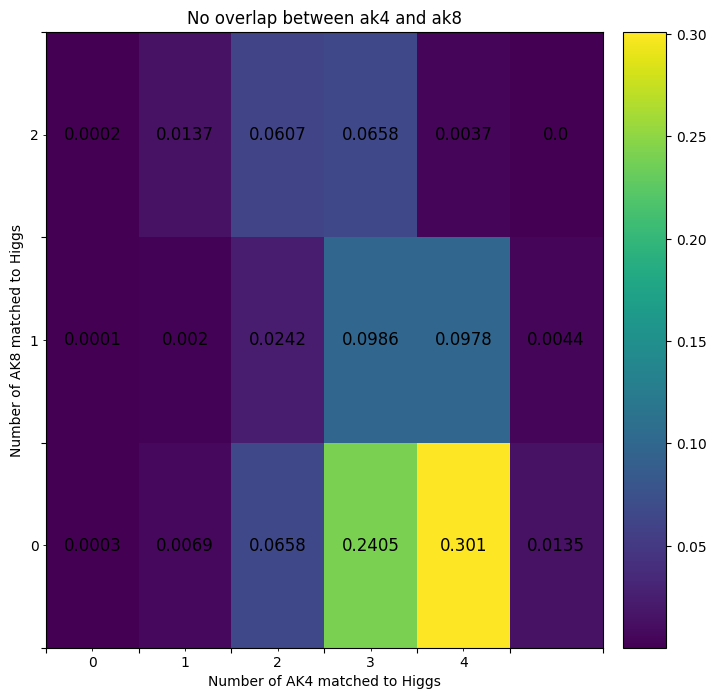

In [44]:
nevents = num_ak4m2h1_nooverlap.shape[0]
h = hist.Hist(nak4_axis, nak8_axis)
h.fill(nak8=num_ak8m2h, nak4=num_ak4m2h_nooverlap)

h = h/nevents

fig, ax = plt.subplots(figsize=(8, 8))
mplhep.hist2dplot(h, ax=ax, flow='none')
values, bins_x, bins_y = h.to_numpy()
for i in range(len(bins_x) - 1):
    for j in range(len(bins_y) - 1):
        ax.text(
            (bins_x[i] + bins_x[i + 1]) / 2,
            (bins_y[j] + bins_y[j + 1]) / 2,
            values[i, j].round(4),
            color="black",
            ha="center",
            va="center",
            fontsize=12,
        )
# Hide major tick labels
ax.set_xticklabels('')
ax.set_yticklabels('')

# Customize minor tick labels
ax.set_xticks([0.5,1.5,2.5,3.5,4.5],      minor=True)
ax.set_xticklabels(['0','1','2','3','4'], minor=True)
ax.set_yticks([0.5,1.5,2.5],      minor=True)
ax.set_yticklabels(['0','1','2'], minor=True)
ax.set_title("No overlap between ak4 and ak8")

In [45]:
# to have a reconstrucible higgs by ak8 we need 1 AK8 jets matched to each H
num_h1recak8 = (np.sum(indexak8 == 0, axis=1)==1).astype(int)
num_h2recak8 = (np.sum(indexak8 == 1, axis=1)==1).astype(int)
print(num_h1recak8)
print(num_h2recak8)
num_hrecak8 = num_h1recak8 + num_h2recak8

# to have a reconstrucible higgs by ak4 we need 2 AK4 jets matched to each H
num_h1recak4_nooverlap = (np.sum((indexak4 == 0) & (overlap_fj_h1 == False), axis=1)==2).astype(int)
num_h2recak4_nooverlap = (np.sum((indexak4 == 1) & (overlap_fj_h2 == False), axis=1)==2).astype(int)
print(num_h1recak4_nooverlap)
print(num_h2recak4_nooverlap)
num_hrecak4_nooverlap = num_h1recak4_nooverlap + num_h2recak4_nooverlap

[0 1 0 ... 0 0 1]
[0 0 0 ... 1 0 0]
[1 0 1 ... 1 1 1]
[0 1 1 ... 0 0 1]


Text(0.5, 1.0, 'No overlap between ak4 and ak8')

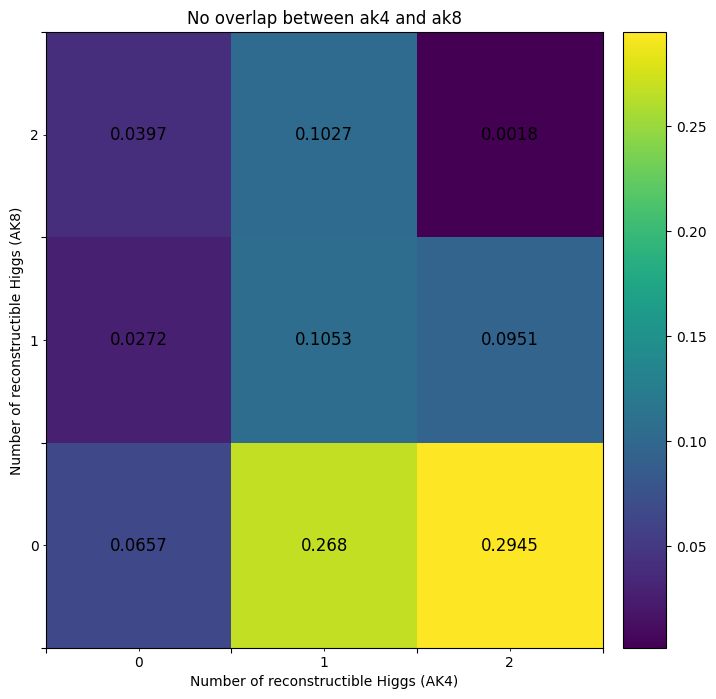

In [46]:
nevents = num_h1recak8.shape[0]
h = hist.Hist(nak4_rec_axis, nak8_rec_axis)
h.fill(nak8=num_hrecak8, nak4=num_hrecak4_nooverlap)

h = h/nevents

fig, ax = plt.subplots(figsize=(8, 8))
mplhep.hist2dplot(h, ax=ax, flow='none')
values, bins_x, bins_y = h.to_numpy()
for i in range(len(bins_x) - 1):
    for j in range(len(bins_y) - 1):
        ax.text(
            (bins_x[i] + bins_x[i + 1]) / 2,
            (bins_y[j] + bins_y[j + 1]) / 2,
            values[i, j].round(4),
            color="black",
            ha="center",
            va="center",
            fontsize=12,
        )
# Hide major tick labels
ax.set_xticklabels('')
ax.set_yticklabels('')

# Customize minor tick labels
ax.set_yticks([0.5,1.5,2.5],      minor=True)
ax.set_yticklabels(['0','1','2'], minor=True)
ax.set_xticks([0.5,1.5,2.5],      minor=True)
ax.set_xticklabels(['0','1','2'], minor=True)
ax.set_title("No overlap between ak4 and ak8")

In [47]:
values

array([[0.065718, 0.027214, 0.039666],
       [0.267996, 0.105299, 0.102653],
       [0.294544, 0.09514 , 0.00177 ]])